### Bienvenidos a mi proyecto de Analisis de datos, espero sea de su agrado!

### Primero importo librerias y funciones de librerias

In [1]:
import numpy as np 
# Numpy lo uso para hacer y organizar matrices
import pandas as pd
# Pandas lo utilizo para toda la organización de los datos
import matplotlib.pyplot as plt
# Matplot lo uso para crear visualizaciones, y dimensionar un tanto los datos

# A partir de aca importo objetos propias de analisis
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Empiezo por leer los datos
df = pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
# Luego considero importante entender las caracteristicas del data frame
df.info()
# Como podemos observar nos brinda información sobre las caracteristicas de las casas, los detalles se encuentran en https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

El dataset contiene:
- 23 variables nominales: MSSubClass, MSZoning, Street, Alley, LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMat1, Exterior1, Exterior2, MasVnrType, Foundation, Heating, Central Air, GarageType, MiscFeature, SaleType, SaleCondition. 
[Nominal entendido como variable no numerica con categorias, ej: 'MsZoning' tiene categorias como: 
 a=agricultura, c=comercial, i=industrial]

- 22 varibles ordinales: LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence. 
[Ordinal entendido como variables no numericas, en la que existe un orden, ej, 'Utilities' tiene categorias como: 
 AllPub = todas las servicios publicos (gas, agua, electricidad, tanque septico), ELO = solo electricidad.]

- 14 variables discretas: YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, FireplaceQu, GarageYrBlt, GarageCars, MoSold, YrSold. 
[Discreta entendido como variable numerica que no toma valor entre dos números consecutivos, 
 ej 'Kitchen' = cantidad de cocinas, 'Bedroom' = cantidad de cuartos.]

- 20 varibles continua: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, Garage Area, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SSnPorch, ScreenPorch, PoolArea, MicsVal, SalePrice. 
[Continua entendido como variable numerica que toma valor en un intervalo, ej 'WoodDeckSF' = pies cuadrados de piso de madera, 'LotFrontage' = cantidad de pies de calle que dan acceso a la casa.]

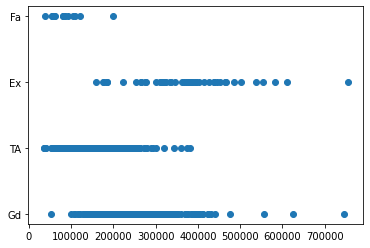

In [4]:
plt.scatter(df["SalePrice"],df["ExterQual"])
plt.show()

# Relaciono el precio con la calidad del material del exterior donde Ex= excelente, Gd= bueno, TA= promedio/tipico, Fa= justo, Po= Razonable.
# Scatter sirve para hacer un gráfico de dispersión, gráfica un punto por cada observación.

In [5]:
df = df[['SalePrice','MSSubClass','OverallQual','OverallCond','Fireplaces', 'GarageArea', 'SaleCondition',
     'Street','MSZoning','LandContour','Utilities','LandSlope','ExterQual','CentralAir','KitchenQual','SaleType']]
df.head(2)

# Elijo aquellas columnas que considero que tienen relación con el precio de las viviendas, y edito el df para que contenga solo
# estos datos

,SalePrice,MSSubClass,OverallQual,OverallCond,Fireplaces,GarageArea,SaleCondition,Street,MSZoning,LandContour,Utilities,LandSlope,ExterQual,CentralAir,KitchenQual,SaleType
0,208500,60,7,5,0,548,Normal,Pave,RL,Lvl,AllPub,Gtl,Gd,Y,Gd,WD
1,181500,20,6,8,1,460,Normal,Pave,RL,Lvl,AllPub,Gtl,TA,Y,TA,WD


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   OverallQual    1460 non-null   int64 
 3   OverallCond    1460 non-null   int64 
 4   Fireplaces     1460 non-null   int64 
 5   GarageArea     1460 non-null   int64 
 6   SaleCondition  1460 non-null   object
 7   Street         1460 non-null   object
 8   MSZoning       1460 non-null   object
 9   LandContour    1460 non-null   object
 10  Utilities      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  ExterQual      1460 non-null   object
 13  CentralAir     1460 non-null   object
 14  KitchenQual    1460 non-null   object
 15  SaleType       1460 non-null   object
dtypes: int64(6), object(10)
memory usage: 182.6+ KB


In [7]:
print(set(df["Street"]))
print(set(df["MSZoning"]))
print(set(df["LandContour"]))
print(set(df["Utilities"]))
print(set(df["LandSlope"]))
print(set(df["ExterQual"]))
print(set(df["CentralAir"]))
print(set(df["KitchenQual"]))
print(set(df["SaleType"]))
print(set(df["SaleCondition"]))

{'Pave', 'Grvl'}
{'RL', 'C (all)', 'RH', 'FV', 'RM'}
{'Lvl', 'Bnk', 'HLS', 'Low'}
{'AllPub', 'NoSeWa'}
{'Mod', 'Gtl', 'Sev'}
{'TA', 'Gd', 'Fa', 'Ex'}
{'N', 'Y'}
{'TA', 'Gd', 'Fa', 'Ex'}
{'ConLw', 'CWD', 'ConLD', 'COD', 'Oth', 'New', 'WD', 'Con', 'ConLI'}
{'Family', 'AdjLand', 'Alloca', 'Partial', 'Abnorml', 'Normal'}


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols=['Street','MSZoning','LandContour','Utilities','LandSlope','ExterQual','CentralAir','KitchenQual','SaleType','SaleCondition']
def editar_cols(cols):
    for col in cols:
        df[col]= le.fit_transform(df[col])
    return df

editar_cols(cols)

,SalePrice,MSSubClass,OverallQual,OverallCond,Fireplaces,GarageArea,SaleCondition,Street,MSZoning,LandContour,Utilities,LandSlope,ExterQual,CentralAir,KitchenQual,SaleType
0,208500,60,7,5,0,548,4,1,3,3,0,0,2,1,2,8
1,181500,20,6,8,1,460,4,1,3,3,0,0,3,1,3,8
2,223500,60,7,5,1,608,4,1,3,3,0,0,2,1,2,8
3,140000,70,7,5,1,642,0,1,3,3,0,0,3,1,2,8
4,250000,60,8,5,1,836,4,1,3,3,0,0,2,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,60,6,5,1,460,4,1,3,3,0,0,3,1,3,8
1456,210000,20,6,6,2,500,4,1,3,3,0,0,3,1,3,8
1457,266500,70,7,9,2,252,4,1,3,3,0,0,0,1,2,8
1458,142125,20,5,6,0,240,4,1,3,3,0,0,3,1,2,8


In [9]:
set(df["KitchenQual"])

{0, 1, 2, 3}

# A partir de esta celda arranco con los modelos de analisis de datos

In [10]:
X =df.drop("SalePrice",axis=1)   #Defino el df para trabajar, son aquellos datos que no contienen el objetivo
Y=df['SalePrice']                #Defino el df objetivo, aquello que tengo la intención de predecir

print(X.shape, type(X))          #En estas lineas chequeo la forma y que tipo de dato consegui
print(Y.shape, type(Y))

(1460, 15) <class 'pandas.core.frame.DataFrame'>
(1460,) <class 'pandas.core.series.Series'>


# Empiezo por un modelo de regresión lineal

In [11]:
regressor = LinearRegression()  
regressor.fit(X,Y)              #Importo el modelo, y luego lo entreno con los df formados. 
regressor.score(X,Y)            #Nuestro modelo predice en un 74% los precios de las viviendas. 

0.7441572850343605

In [12]:
predic_linear_regression = regressor.predict(X)                             #en estas lineas busco guardar las predicciones para
print(predic_linear_regression.shape, type(predic_linear_regression))       #luego analizarlas

(1460,) <class 'numpy.ndarray'>


In [13]:
df.insert(0, 'pred', predic_linear_regression)                              #lo inserto en el df original

In [14]:
df.sample(4)

,pred,SalePrice,MSSubClass,OverallQual,OverallCond,Fireplaces,GarageArea,SaleCondition,Street,MSZoning,LandContour,Utilities,LandSlope,ExterQual,CentralAir,KitchenQual,SaleType
529,202269.177023,200624,20,6,3,2,484,2,1,3,3,0,0,2,1,3,8
747,248262.987467,265979,70,7,7,1,864,4,1,4,3,0,0,2,0,2,8
1239,273250.501741,265900,20,8,5,1,472,4,1,3,1,0,0,2,1,0,8
960,96246.714165,116500,20,5,7,0,0,4,1,3,3,0,0,3,1,3,8


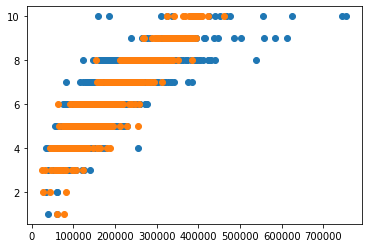

In [15]:
plt.scatter( x='SalePrice', y='OverallQual', data=df)                       #Y finalmente comparo los datos obtenidos con los
plt.scatter( x='pred', y='OverallQual', data=df)                            # encontrados ;)

# 

# Luego sigo con un Random Forest

In [16]:
X =df.drop(columns=['pred', 'SalePrice'])   #Nuevamente defino la X para el modelo, esta vez descarto las predicciones del modelo Linnear
Y=df['SalePrice']                           #Defino el df objetivo, igual que antes

print(X.shape, type(X))                     #En estas lineas chequeo la forma y que tipo de dato consegui
print(Y.shape, type(Y))

(1460, 15) <class 'pandas.core.frame.DataFrame'>
(1460,) <class 'pandas.core.series.Series'>


In [17]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X=X, y=Y)

DecisionTreeClassifier(max_depth=3)

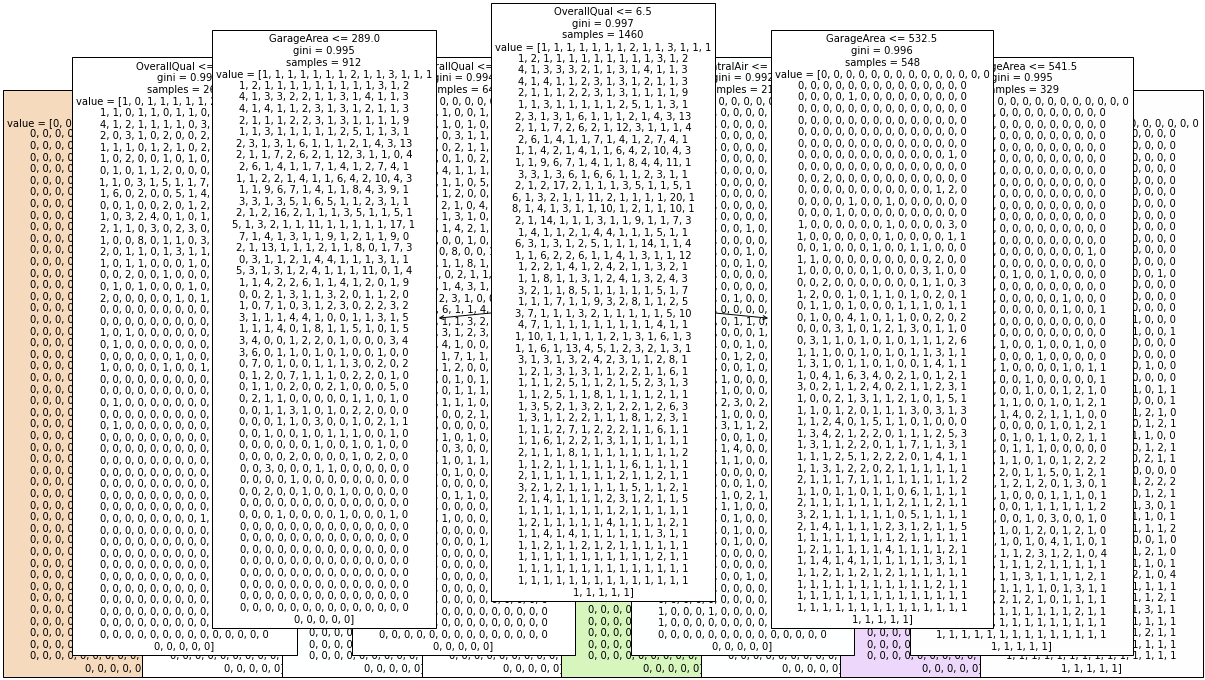

In [18]:
plt.figure(figsize=(20,2))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=10);

In [19]:
model.score(X,Y) # El decision tree se usa para problemas de clasificacion de si y no, es por esto que le fue tan mal, nuestro problema es un problema de regresión.

0.028082191780821917

# 

# Termino con una Regresion Logistica

In [20]:
LogReg= LogisticRegression() #Importo el modelo
LogReg.fit(X, Y)  #Entreno con los pertinentes

#Este es el pie para crear un proceso para estandarizar los datos!

C:\Users\daich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
LogReg.score(X,Y) #Incluso como apreciamos aca, el score que brinda el proyecto es estas condiciones es muy bajo

0.021917808219178082

In [22]:
scaler = StandardScaler()
x_transform= scaler.fit_transform(X)
y_transform= scaler.fit_transform(Y.values.reshape(-1,1))
y_transform=y_transform.astype('int')

In [23]:
LogReg.fit(x_transform, y_transform)

C:\Users\daich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
LogReg.score(x_transform, y_transform)

0.8486301369863014

In [25]:
predic_LogReg = LogReg.predict(x_transform)

In [26]:
df.drop(columns=['pred']) 

,SalePrice,MSSubClass,OverallQual,OverallCond,Fireplaces,GarageArea,SaleCondition,Street,MSZoning,LandContour,Utilities,LandSlope,ExterQual,CentralAir,KitchenQual,SaleType
0,208500,60,7,5,0,548,4,1,3,3,0,0,2,1,2,8
1,181500,20,6,8,1,460,4,1,3,3,0,0,3,1,3,8
2,223500,60,7,5,1,608,4,1,3,3,0,0,2,1,2,8
3,140000,70,7,5,1,642,0,1,3,3,0,0,3,1,2,8
4,250000,60,8,5,1,836,4,1,3,3,0,0,2,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,60,6,5,1,460,4,1,3,3,0,0,3,1,3,8
1456,210000,20,6,6,2,500,4,1,3,3,0,0,3,1,3,8
1457,266500,70,7,9,2,252,4,1,3,3,0,0,0,1,2,8
1458,142125,20,5,6,0,240,4,1,3,3,0,0,3,1,2,8


In [27]:
df.insert(0, 'predict_logReg', predic_LogReg)      

In [28]:
df.sample(5)

,predict_logReg,pred,SalePrice,MSSubClass,OverallQual,OverallCond,Fireplaces,GarageArea,SaleCondition,Street,MSZoning,LandContour,Utilities,LandSlope,ExterQual,CentralAir,KitchenQual,SaleType
1246,0,220252.352168,186500,60,7,5,0,615,5,1,1,3,0,0,2,1,2,6
14,0,164153.335730,157000,20,6,5,1,352,4,1,3,3,0,0,3,1,3,8
355,0,187115.308681,177500,20,6,5,0,521,4,1,3,3,0,0,2,1,2,8
151,1,286098.376166,372402,20,8,5,1,866,5,1,3,3,0,0,2,1,2,6
990,1,278977.686800,348000,60,8,5,1,870,4,1,3,3,0,0,2,1,2,8


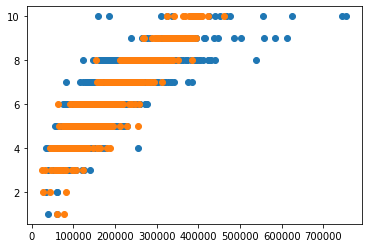

In [29]:
plt.scatter( x='SalePrice', y='OverallQual', data=df)                 
plt.scatter( x='pred', y='OverallQual', data=df)